In [ ]:
import os
import sys
import ast
import cv2
import json
import math
import shutil
import random
import pickle
import imageio
import numpy as np
import pandas as pd
from PIL import Image
from collections import defaultdict
from tqdm import tqdm
from pprint import pprint
from pandarallel import pandarallel
import matplotlib.pyplot as plt
sys.path.append('../')
from utils import normalize_image, plot_image, plot_images

## Download COYO-300M dataset

In [2]:
import datasets
from datasets import load_dataset

# # try to save to a different place but failed
# os.environ["HF_HOME"] = '/data2/jupiter/datasets/coyo-700m-webdataset'
# os.environ["HF_DATASETS_CACHE"] = '/data2/jupiter/datasets/coyo-700m-webdataset'
# datasets.config.DOWNLOADED_DATASETS_PATH = '/data2/jupiter/datasets/coyo-700m-webdataset'

# create soft links instead, now cache is redirected to /data/jupiter/li.yu/.cache/huggingface
ds = load_dataset("kakaobrain/coyo-labeled-300m", download_mode="force_redownload")

README.md:   0%|          | 0.00/8.54k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/128 [00:00<?, ?it/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/534M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/668M [00:00<?, ?B/s]

(…)d7-b02e-c1562fdf3cf9-c000.snappy.parquet:   0%|          | 0.00/618M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/300504326 [00:00<?, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

## Check huggingface downloaded parquets and compare with mass downloaded ones

In [36]:
data_dir = '/data2/jupiter/datasets/coyo-700m-webdataset'
label_parquets = os.listdir(f'{data_dir}/huggingface/data')
print(len(label_parquets))
pi = 0
df = pd.read_parquet(f'{data_dir}/huggingface/data/{label_parquets[pi]}')
print(df.shape)
df.sample(2)

128
(2436880, 7)


,id,url,imagehash,labels,label_probs,width,height
2326891,4861903041343,https://www.floornature.it/media/photos/30/141...,cf1dcb52b86a4a34,"[11732, 11725, 11731, 8593, 4649, 4606, 10339,...","[0.41357422, 0.17016602, 0.15966797, 0.0825195...",201,312
1077416,3315715146545,https://images.whisystems.com/smartpages/parti...,bb3dd6d028c8cc99,"[5023, 5017, 5026, 5022, 5025, 5016, 5020, 992...","[0.984375, 0.043548584, 0.022506714, 0.0222015...",1500,1090


In [50]:
df2 = pd.read_parquet(f'{data_dir}/snappy.parquets/part-00000-17da4908-939c-46e5-91d0-15f256041956-c000.snappy.parquet')
df2['imagehash'] = df2['image_phash']
print(df2.shape)
df2.sample(2)

(5836073, 18)


,id,url,text,width,height,image_phash,text_length,word_count,num_tokens_bert,num_tokens_gpt,num_faces,clip_similarity_vitb32,clip_similarity_vitl14,nsfw_score_opennsfw2,nsfw_score_gantman,watermark_score,aesthetic_score_laion_v2,imagehash
2584156,5506148741227,https://cdn.shopify.com/s/files/1/0016/7041/44...,"White Story, Elizabeth White/Navy Dress with L...",372,579,b3ce7393cc243364,52,9,11,13,0,0.314697,0.278320,0.017166,0.152232,0.010543,5.060276,b3ce7393cc243364
2845499,764504835123,https://cdn.motor1.com/images/mgl/0Zq2j/s4/pol...,Government reveals plans to keep Kent moving i...,889,500,f8f3034fb71e0611,63,12,13,12,1,0.244263,0.215332,0.000648,0.027554,0.013501,4.878096,f8f3034fb71e0611


In [51]:
df3 = df[df.imagehash.isin(df2.image_phash)]
print(df3.shape)

(23932, 7)


In [52]:
df3 = pd.read_parquet(f'{data_dir}/metadata/00000.parquet')
print(df3.shape)
df3.sample(2)

(10000, 17)


,clip_similarity_vitb32,clip_similarity_vitl14,nsfw_score_opennsfw2,nsfw_score_gantman,watermark_score,aesthetic_score_laion_v2,caption,url,key,status,error_message,width,height,original_width,original_height,exif,sha256
9140,0.351562,0.325195,0.008240,0.011143,0.681041,4.754261,A line drawing - Symbol Modular Seating–Right ...,https://www.hermanmiller.com/content/dam/hmico...,000009152,success,None,384.0,384.0,1600.0,1600.0,{},052cc762751f8bfe5cd8cf2c891c125ebfdb40bb93e06b...
8140,0.322510,0.302490,0.021332,0.020167,0.006990,4.550869,Color Coated Coil Roof Tiles,http://i.bosscdn.com/product/25/98/33/20807d49...,000008153,success,None,220.0,220.0,220.0,220.0,{},a4d6ff522436b268769fe9dad9a6eaf7da7fadcd662eff...


In [54]:
df4 = df[df.url.isin(df3.url)]
print(df4.shape)
df4 = df[['url', 'imagehash', 'labels', 'label_probs']].merge(df3[['url', 'caption', 'key']], on='url')
df4.shape

(37, 7)


(37, 6)

In [4]:
df4 = pd.read_csv(os.path.join(data_dir, 'matches', f'0_0_150.csv'))
df4.shape

(5528, 7)

In [5]:
df4.head(5)

,url,imagehash,labels,label_probs,caption,key,part1m_dir
0,https://plk.s6img.com/society6/img/7V-gePcL4U8...,96094b7e4d3f26e0,[ 8066 6683 6681 9150 21660 6195 6682 121...,[0.27539062 0.1616211 0.13623047 0.08178711 0...,Arabidopsis thaliana (thale cress) root vacuol...,501717,tar_0_150
1,https://cdn.shopify.com/s/files/1/0095/5773/75...,a3c9c3b0351fd692,[ 5745 7491 7672 5717 7671 10265 9629 216...,[0.33642578 0.15356445 0.10687256 0.05023193 0...,Soloist Guitar Hanger and Accessory Starter Pack,116197,tar_0_150
2,https://static.wixstatic.com/media/7048aa_bf79...,c5833f3891876e53,[14118 14116 14172 21717 21668 10057 14368 117...,[0.3869629 0.32104492 0.14147949 0.02929688 0...,The Changing World & Transforming Our Thinking,386893,tar_0_150
3,https://iwh.on.ca/sites/iwh/files/styles/boots...,90b8749f90db49e5,[12221 12180 12163 12179 12177 12169 12214 103...,[0.5395508 0.13757324 0.12927246 0.12304688 0...,Word cannabis highlighted in a journal article,185715,tar_0_150
4,https://www.hitechreview.com/uploads/2009/07/D...,bb875ae0e0f0c47a,[ 8652 11276 21677 11211 11788 6747 9083 55...,[0.4663086 0.4645996 0.23120117 0.16394043 0...,Dell Inspiron 15 options,613748,tar_0_150


In [72]:
i = 10
row = df4.iloc[i]
print(row.url)
print(row.caption)
labels = [class_description[_id] for _id, _p in zip(row.labels, row.label_probs) if _p > 0.2]
labels

https://cdn05.carsforsale.com/00f6f38f49d55fd3ebd370e1b07ca3393f/480x360/2008-bmw-x3-3-0si-awd-4dr-suv.jpg
2008 BMW X3 for sale at 411 Trucks & Auto Sales Inc. in Maryville TN


['sport utility, sport utility vehicle, S.U.V., SUV', 'four-wheel drive, 4WD']

In [9]:
len(df4.key.unique())

5526

## Match huggingface labels with mass downloaded images/metadata

In [91]:
# get matches between huggingface downloaded labels and raw image data
dfs = []
for pi in range(128):
    df = pd.read_parquet(f'{data_dir}/huggingface/data/{label_parquets[pi]}')
    print(pi, df.shape)
    for part1m_i in range(145):
        M, N = part1m_i*150, (part1m_i+1)*150
        match_csv = os.path.join(data_dir, 'matches', f'{pi}_{M}_{N}.csv')
        # part1m_dir = os.path.join(data_dir, f'tar_{M}_{N}')
        if os.path.isfile(match_csv):
            continue
        dfs2 = [pd.read_parquet(f'{data_dir}/metadata/{str(part10k_i).zfill(5)}.parquet') for part10k_i in tqdm(range(M, N), total=150)]
        # for part10k_i in tqdm(range(M, N), total=150):
        #     df2 = pd.read_parquet(f'{data_dir}/metadata/{str(part10k_i).zfill(5)}.parquet')
        df2 = pd.concat(dfs2, ignore_index=True)
        df3 = df[['url', 'imagehash', 'labels', 'label_probs']].merge(df2[['url', 'caption', 'key']], on='url')
        if len(df3) > 0:
            df3['part1m_dir'] = f'tar_{M}_{N}'
            df3.to_csv(match_csv, index=False)
            dfs.append(df3)
        print(f'checked folder tar_{M}_{N} and found {len(df3)} matches')
df_final = pd.concat(dfs, ingore_index=True)
df_final.shape

corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06278.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06279.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06280.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06281.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06282.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06283.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06284.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06285.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06286.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06287.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06288.parquet
corrupted file: /data2/jupiter/datasets/coyo-700m-webdataset/metadata/06289.

In [57]:
# load in classes
pickle_file = os.path.join(data_dir, 'imagenet21k_tree.pickle')
with open(pickle_file, 'rb') as f:
    data = pickle.load(f)
type(data), data.keys()

(dict,
 dict_keys(['class_list', 'class_description', 'class_tree_list', 'class_word', 'class_tree_word']))

In [58]:
class_description = data['class_description']
class_description

{0: 'organism, being',
 1: 'benthos',
 2: 'heterotroph',
 3: 'cell',
 4: 'person, individual, someone, somebody, mortal, soul',
 5: 'animal, animate being, beast, brute, creature, fauna',
 6: 'plant, flora, plant life',
 7: 'food, nutrient',
 8: 'artifact, artefact',
 9: 'hop',
 10: 'check-in',
 11: 'dressage',
 12: 'curvet, vaulting',
 13: 'piaffe',
 14: 'funambulism, tightrope walking',
 15: 'rock climbing',
 16: 'contact sport',
 17: 'outdoor sport, field sport',
 18: 'gymnastics, gymnastic exercise',
 19: 'acrobatics, tumbling',
 20: 'track and field',
 21: 'track, running',
 22: 'jumping',
 23: 'broad jump, long jump',
 24: 'high jump',
 25: 'Fosbury flop',
 26: 'skiing',
 27: 'cross-country skiing',
 28: 'ski jumping',
 29: 'water sport, aquatics',
 30: 'swimming, swim',
 31: 'bathe',
 32: 'dip, plunge',
 33: 'dive, diving',
 34: 'floating, natation',
 35: "dead-man's float, prone float",
 36: 'belly flop, belly flopper, belly whop, belly whopper',
 37: 'cliff diving',
 38: 'flip

In [15]:
class_tree_list = data['class_tree_list']
len(class_tree_list), class_tree_list

(21841,
 {0: [0],
  1: [1, 0],
  2: [2, 0],
  3: [3],
  4: [4, 0],
  5: [5, 0],
  6: [6, 0],
  7: [7],
  8: [8],
  9: [9],
  10: [10],
  11: [11, 80, 79, 173],
  12: [12, 11, 80, 79, 173],
  13: [13, 11, 80, 79, 173],
  14: [14, 173],
  15: [15, 173],
  16: [16, 173],
  17: [17, 173],
  18: [18, 173],
  19: [19, 18, 173],
  20: [20, 173],
  21: [21, 20, 173],
  22: [22, 20, 173],
  23: [23, 22, 20, 173],
  24: [24, 22, 20, 173],
  25: [25, 24, 22, 20, 173],
  26: [26, 173],
  27: [27, 26, 173],
  28: [28, 26, 173],
  29: [29, 173],
  30: [30, 29, 173],
  31: [31, 30, 29, 173],
  32: [32, 30, 29, 173],
  33: [33, 30, 29, 173],
  34: [34, 30, 29, 173],
  35: [35, 34, 30, 29, 173],
  36: [36, 33, 30, 29, 173],
  37: [37, 33, 30, 29, 173],
  38: [38, 33, 30, 29, 173],
  39: [39, 33, 30, 29, 173],
  40: [40, 33, 30, 29, 173],
  41: [41, 33, 30, 29, 173],
  42: [42, 33, 30, 29, 173],
  43: [43, 30, 29, 173],
  44: [44, 43, 30, 29, 173],
  45: [45, 43, 30, 29, 173],
  46: [46, 29, 173],
  47:

In [11]:
data['class_word']

{'organism': [0],
 'being': [0],
 'benthos': [1, 14150],
 'heterotroph': [2],
 'cell': [3, 5480, 5481, 5486],
 'person': [4],
 'individual': [4],
 'someone': [4],
 'somebody': [4],
 'mortal': [4],
 'soul': [4],
 'animal': [5],
 'animate being': [5],
 'beast': [5],
 'brute': [5],
 'creature': [5, 15310],
 'fauna': [5],
 'plant': [6, 9304],
 'flora': [6],
 'plant life': [6],
 'food': [7],
 'nutrient': [7],
 'artifact': [8],
 'artefact': [8],
 'hop': [9],
 'check-in': [10],
 'dressage': [11],
 'curvet': [12],
 'vaulting': [12],
 'piaffe': [13],
 'funambulism': [14],
 'tightrope walking': [14],
 'rock climbing': [15],
 'contact sport': [16],
 'outdoor sport': [17],
 'field sport': [17],
 'gymnastics': [18],
 'gymnastic exercise': [18],
 'acrobatics': [19],
 'tumbling': [19],
 'track and field': [20],
 'track': [21, 11393, 11394],
 'running': [21],
 'jumping': [22],
 'broad jump': [23],
 'long jump': [23],
 'high jump': [24],
 'Fosbury flop': [25],
 'skiing': [26],
 'cross-country skiing': 

In [14]:
data['class_tree_word']

{'organism': [0],
 'being': [0],
 'benthos': [1, 14150, 0],
 'heterotroph': [2, 0],
 'cell': [3,
  5480,
  5481,
  5486,
  6601,
  6248,
  8,
  9907,
  4336,
  10901,
  9654,
  12202,
  11150,
  12184,
  6572,
  6639,
  6693],
 'person': [4, 0],
 'individual': [4, 0],
 'someone': [4, 0],
 'somebody': [4, 0],
 'mortal': [4, 0],
 'soul': [4, 0],
 'animal': [5, 15310, 0],
 'animate being': [5, 15310, 0],
 'beast': [5, 15310, 0],
 'brute': [5, 15310, 0],
 'creature': [5, 15310, 0, 4],
 'fauna': [5, 15310, 0],
 'plant': [6, 9304, 0, 11937, 5126, 10901, 8],
 'flora': [6, 9304, 0],
 'plant life': [6, 9304, 0],
 'food': [7],
 'nutrient': [7],
 'artifact': [8],
 'artefact': [8],
 'hop': [9],
 'check-in': [10],
 'dressage': [11, 80, 79, 173, 16903, 16904],
 'curvet': [12, 11, 80, 79, 173, 16903, 16904],
 'vaulting': [12, 11, 80, 79, 173, 16903, 16904],
 'piaffe': [13, 11, 80, 79, 173, 16903, 16904],
 'funambulism': [14, 173, 16903, 16904],
 'tightrope walking': [14, 173, 16903, 16904],
 'rock cl

In [22]:
# try to group classes
groups = []
for class_i, class_belongs in class_tree_list.items():
    in_a_group = False
    for g in groups:
        for class_i in class_belongs:
            if class_i in g:
                in_a_group = True
        if in_a_group:
            g.update(class_belongs)
    if not in_a_group:
        groups.append(set(class_belongs))
print(len(groups))

469

In [29]:
# combine groups
groups_cmb_flags = [False] * len(groups)
new_groups = []
for i in range(len(groups)-1):
    if groups_cmb_flags[i]:  # has been merged
        continue
    for j in range(i+1, len(groups)):
        if groups_cmb_flags[j]:  # has been merged
            continue
        if len(groups[i].intersection(groups[j])) > 0:
            groups[i].update(groups[j])
            groups_cmb_flags[j] = True
    new_groups.append(groups[i])
    groups_cmb_flags[i] = True
print(len(new_groups))

1


## Filter and create one-hot-encoding labels

In [10]:
# load label file
part1m_i = 0
M, N = part1m_i*150, (part1m_i+1)*150
label_csv = os.path.join(data_dir, 'matches_downloaded', f'label_{M}_{N}.csv')
label_df = pd.read_csv(label_csv)
label_df.shape

(459890, 8)

In [12]:
label_df.head(2)

,url,imagehash,labels,label_probs,caption,key,part1m_dir,downloaded
0,https://cdn.shopify.com/s/files/1/0095/5773/75...,a3c9c3b0351fd692,[ 5745 7491 7672 5717 7671 10265 9629 216...,[0.33642578 0.15356445 0.10687256 0.05023193 0...,Soloist Guitar Hanger and Accessory Starter Pack,116197,tar_0_150,True
1,https://static.wixstatic.com/media/7048aa_bf79...,c5833f3891876e53,[14118 14116 14172 21717 21668 10057 14368 117...,[0.3869629 0.32104492 0.14147949 0.02929688 0...,The Changing World & Transforming Our Thinking,386893,tar_0_150,True


In [51]:
# filter label by prob
def convert_ints(ints_str):
    _ls = ints_str[1:-1].split(' ')
    ls = []
    for l in _ls:
        if len(l) > 0:
            ls.append(int(l.strip()))
    return ls
def convert_floats(floats_str):
    _ls = floats_str[1:-1].split(' ')
    ls = []
    for l in _ls:
        if len(l) > 0:
            ls.append(float(l.strip()))
    return ls
def filter_label(row, p_thres=0.2):
    labels = convert_ints(row.labels)
    label_probs = convert_floats(row.label_probs)
    labels = [l for l,p in zip(labels, label_probs) if p > p_thres]
    row['labels_filtered'] = labels
    return row

pandarallel.initialize(nb_workers=16, progress_bar=False)
all_label_dfs = []
for part1m_i in tqdm(range(145), total=145):
    M, N = part1m_i*150, (part1m_i+1)*150
    label_csv = os.path.join(data_dir, 'matches_downloaded', f'label_{M}_{N}.csv')
    label_df = pd.read_csv(label_csv)
    label_df = label_df.parallel_apply(lambda r: filter_label(r), axis=1)
    all_label_dfs.append(label_df[['key', 'part1m_dir', 'labels_filtered']])
all_label_df = pd.concat(all_label_dfs, ignore_index=True)
all_label_df.shape

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


(65875880, 3)

In [54]:
all_label_df.sample(5)

,key,part1m_dir,labels_filtered
51373178,168195217,tar_16800_16950,[12240]
47041909,153820399,tar_15300_15450,[6860]
35973030,117657310,tar_11700_11850,[4819]
59171877,193976011,tar_19350_19500,[12213]
23885127,77612479,tar_7650_7800,[17864]


In [55]:
all_label_df.to_parquet(os.path.join(data_dir, 'matches_downloaded', 'label_02p.parquet'), index=False)

In [70]:
# count number of images per each class
label_count = [0] * len(class_description)
global label_count
def get_label_count(row, label_count):
    for i in row.labels_filtered:
        label_count[i] += 1

for _,row in tqdm(all_label_df.iterrows(), total=len(all_label_df)):
    get_label_count(row, label_count)

100%|██████████| 65875880/65875880 [46:30<00:00, 23611.18it/s]


86 86


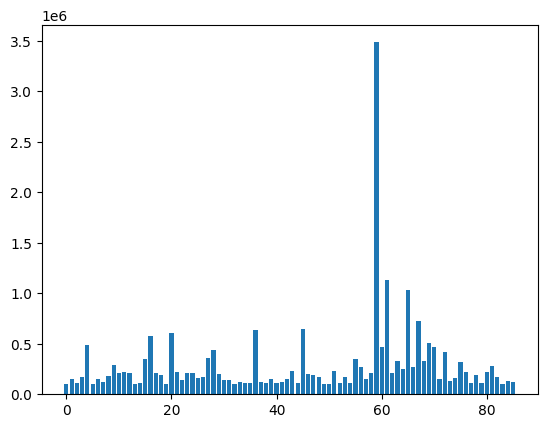

In [86]:
big_counts = [lc for lc in label_count if lc > 100000]
big_count_ids = {}
big_count_class = 0
for i,lc in enumerate(label_count): 
    if lc > 100000:
        big_count_ids[i] = big_count_class
        big_count_class += 1
print(len(big_counts), len(big_count_ids))
plt.bar(range(len(big_counts)), big_counts)
plt.show()

In [ ]:
# get one hot encoding and check class distribution relative to big counts
def check_label(row, big_count_ids):
    row['one_hot_label'] = [0] * len(big_count_ids)
    for i in row.labels_filtered:
        if i in big_count_ids:
            row['one_hot_label'][big_count_ids[i]] = 1
    return row

pandarallel.initialize(nb_workers=16, progress_bar=True)
# all_label_df['one_hot_label'] = [0] * len(big_count_ids)
all_label_df = all_label_df.parallel_apply(lambda r: check_label(r, big_count_ids), axis=1)

In [ ]:
all_label_df.shape